# Python入門(2)

- 関数
- クラス
- 入出力
- ライブラリ

# 記述統計
- データ分析
- グラフ表示

## 関数

memo:  
Colabでインデントを下げるショートカットキーは ctrl+'}'

In [ ]:
# 入力を行う関数

def input_number():
  while True:
    x = input('Enter positive number> ')
    try:
      x = float(x)
    except ValueError:
      print(f'{x}は数値に変換できません。')
      continue
    if x <= 0:
      print(f'{x}は正の数値ではありません。')
      continue
    break
  return x

In [ ]:
# 平方根を求める関数

def square_root(x):
  rnew = x
  while True:
    r1 = rnew
    r2 = x/r1
    rnew = (r1 + r2)/2
    if r1 - r2 < 1.0E-3:
      break
  return rnew

In [ ]:
# 全体の手順

x = input_number()
sq = square_root(x)
print(f'Square root of {x} is {sq}.')

Enter positive number> 2
Square root of 2.0 is 1.4142135623746899.


In [ ]:
# デフォルト引数

def square_root(x, eps=1.0E-6):
  rnew = x
  while True:
    r1 = rnew
    r2 = x/r1
    rnew = (r1 + r2)/2
    if r1 - r2 < eps:
      break
  return rnew

In [ ]:
# 引数1つで呼び出す

square_root(2)

1.414213562373095

In [ ]:
# 仮引数の順に実引数を与えて呼び出す
square_root(2, 1.0E-2)

1.4142156862745097

In [ ]:
# キーワード引数で呼び出す
square_root(2, eps=1.0E-6)

1.414213562373095

## クラス

In [ ]:
# スタックの例

class MyStack():
  def __init__(self, data):
    self.num_list = data

  def push(self, elem):
    self.num_list.append(elem)

  def pop(self):
    if self.is_empty() == True:
      return None
    else:
      x = self.num_list[-1]
      self.num_list = self.num_list[:-1]
      return x

  def is_empty(self):
    return self.num_list == []

  def clear(self):
    self.num_list = []

if __name__ == '__main__':
  st = MyStack([5, 2, 3])
  print(st.pop())
  print(st.pop())
  st.push(8)
  st.push(9)
  print(st.pop())
  print(st.pop())
  print(st.pop())
  print(st.pop())

3
2
9
8
5
None


# 入出力


In [ ]:
# ファイルの作成

data = ''', web, mobile, enterprise, embedded
Python, 80, 30, 90, 70
Java, 85, 60, 85, 40
C, 30, 40, 70, 90
'''

f = open('data.csv', 'w')
f.write(data)
f.close()

In [ ]:
# ファイルの読み込みと表示

f = open('data.csv', 'r')
data = f.readlines()
for line in data:
  elems = line.split(',')
  for e in elems:
    print(f'{e:>12s}', end='')
f.close()

                     web      mobile  enterprise   embedded
      Python          80          30          90         70
        Java          85          60          85         40
           C          30          40          70         90


In [ ]:
# withを用いたファイルの読み込みと表示

with open('data.csv', 'r') as f:
  data = f.readlines()
  for line in data:
    elems = line.split(',')
    for e in elems:
      print(f'{e:>12s}', end='')

                     web      mobile  enterprise   embedded
      Python          80          30          90         70
        Java          85          60          85         40
           C          30          40          70         90


## ライブラリ

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
%precision 3

'%.3f'

### numpy

In [ ]:
# ベクトルや行列は ndarray で保持する

arr2 = np.array([[1.3, 2.5, 3.1], [4.0, 5.1, 6.9]])
print(arr2)
print('type: ', type(arr2))
print('ndim: ', arr2.ndim)
print('shape: ', arr2.shape)
print('dtype: ', arr2.dtype)

[[1.3 2.5 3.1]
 [4.  5.1 6.9]]
type:  <class 'numpy.ndarray'>
ndim:  2
shape:  (2, 3)
dtype:  float64


In [ ]:
# 乱数（平均0、分散1の標準正規分布）で配列の初期値を与える
arr3 = np.random.randn(10)
print(arr3)

[ 1.581 -0.508 -0.772  0.028 -0.506 -0.47  -1.056 -0.278  0.093 -0.941]


In [ ]:
# ブールインデックスを使った参照

arr3[arr3 > 0]

array([1.581, 0.028, 0.093])

In [ ]:
# 行列計算

m1 = np.array([[1, 2], [3, 4]])
m2 = np.array([[5, 6], [7, 8]])

print('original:')
print(m1)
# 転置
print('transposed:')
print(m1.T)
# 逆行列
print('inverse:')
print(np.linalg.inv(m1))
# 対角要素
print('diag:')
print(np.diag(m1))
# 行列式
print('det:')
print(np.linalg.det(m1))
# 固有値
print('eigenvalues:')
print(np.linalg.eig(m1))
# 和
print('sum:')
print(m1 + m2)
# 積
print('product:')
print(m1 @ m2)

original:
[[1 2]
 [3 4]]
transposed:
[[1 3]
 [2 4]]
inverse:
[[-2.   1. ]
 [ 1.5 -0.5]]
diag:
[1 4]
det:
-2.0000000000000004
eigenvalues:
(array([-0.372,  5.372]), array([[-0.825, -0.416],
       [ 0.566, -0.909]]))
sum:
[[ 6  8]
 [10 12]]
product:
[[19 22]
 [43 50]]


### matplotlib

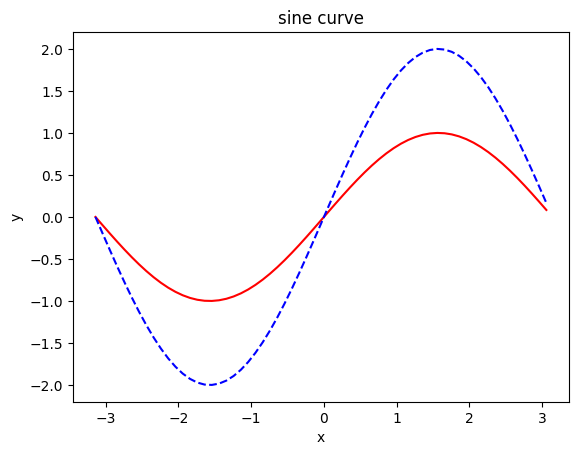

In [ ]:
# 関数のプロット

import math
x = np.arange(-math.pi, math.pi, 0.1)
y = np.sin(x)
plt.title('sine curve')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'r-')
plt.plot(x, y*2, 'b--')

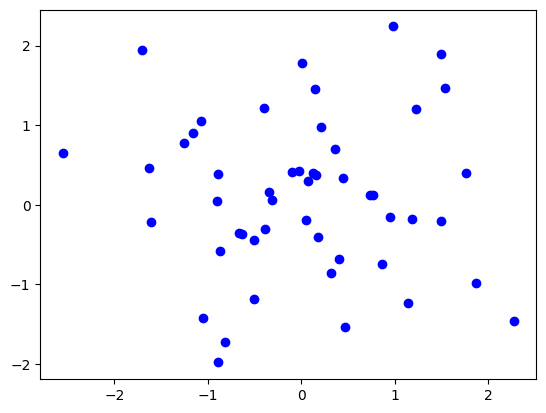

In [ ]:
# 散布図

np.random.seed(0)
# 平均(0,0)、分散1の正規分布から2次元データを50個生成
data = np.random.randn(50, 2)
# マーカの色と形を指定して散布図で表示
plt.scatter(data[:,0], data[:,1], c='blue',marker='o')

(array([  3.,   6.,   9.,  11.,  30.,  40.,  59.,  87., 103., 114., 116.,
        123.,  83.,  77.,  48.,  38.,  22.,  16.,  11.,   4.]),
 array([-3.046, -2.756, -2.466, -2.175, -1.885, -1.595, -1.304, -1.014,
        -0.724, -0.434, -0.143,  0.147,  0.437,  0.727,  1.018,  1.308,
         1.598,  1.889,  2.179,  2.469,  2.759]),
 <BarContainer object of 20 artists>)

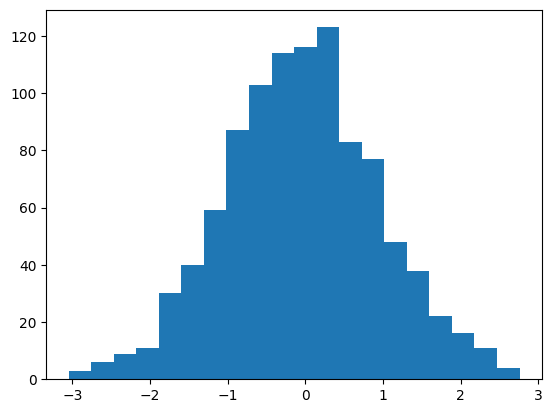

In [ ]:
# ヒストグラム

np.random.seed(0)
# 平均0、分散1の正規分布から1次元データを1000個生成
data = np.random.randn(1000)
# データを20個のbinに分割して、度数・binの端の値を返し、グラフを表示
plt.hist(data, bins=20)

## ライブラリを用いた記述統計とデータの可視化

In [45]:
# 1次元データの生成

np.random.seed(0)
scores = np.random.randint(100, size=10)
scores

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87])

In [46]:
scores_df = pd.DataFrame({'Score':scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='name'))
scores_df

,Score
name,
A,44
B,47
C,64
D,67
E,67
F,9
G,83
H,21
I,36


In [47]:
# 平均値

np.mean(scores)

52.5

In [48]:
scores_df.mean()

Score    52.5
dtype: float64

In [49]:
# 中央値

np.median(scores)

55.5

In [50]:
scores_df.median()['Score']

55.5

In [51]:
# 最頻値

import random

m_f_list = ['m', 'f']
data = random.choices(m_f_list, k=11)

print(data)

pd.Series(data).mode()[0]

['f', 'f', 'f', 'm', 'f', 'm', 'f', 'f', 'f', 'f', 'm']


'f'

In [52]:
# 分散（標本分散）

np.std(scores)

24.3567239176372

In [53]:
# 分散（不偏分散）

scores_df.std()['Score']

25.67424130654432

In [54]:
# 四分位範囲等

scores_df.describe()

,Score
count,10.000000
mean,52.500000
std,25.674241
min,9.000000
25%,38.000000
50%,55.500000
75%,67.000000
max,87.000000


In [55]:
# 標準化

z = (scores - np.mean(scores)) / np.std(scores)
print(z)
print(f'平均: {np.mean(z):.3}, 標準偏差: {np.std(z):.3}')

[-0.349 -0.226  0.472  0.595  0.595 -1.786  1.252 -1.293 -0.677  1.416]
平均: -2.22e-17, 標準偏差: 1.0


In [56]:
# 偏差値

50 + 10 * (scores - np.mean(scores)) / np.std(scores)

array([46.51 , 47.742, 54.721, 55.953, 55.953, 32.14 , 62.522, 37.067,
       43.226, 64.164])

array([[<Axes: title={'center': 'Score'}>]], dtype=object)

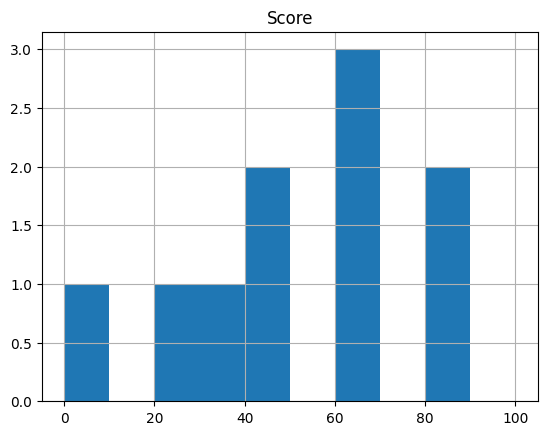

In [57]:
# ヒストグラム

scores_df.hist(bins=10, range=(0,100))

<Axes: >

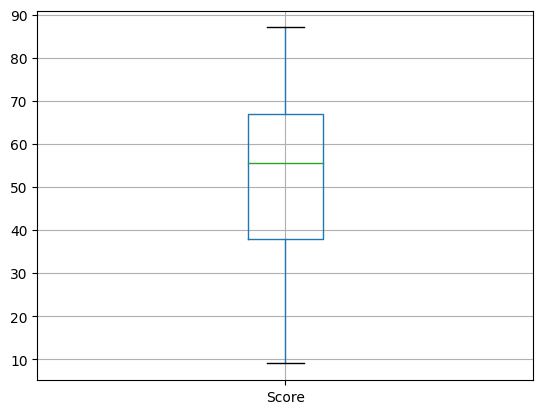

In [58]:
# 箱ひげ図

scores_df.boxplot()

In [59]:
# 2次元データの生成

np.random.seed(17)
en_scores = np.random.randint(100,size=10)
ma_scores = np.random.randint(100,size=10)
scores_df = pd.DataFrame({'Eng':en_scores, 'Math':ma_scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='name'))
scores_df

,Eng,Math
name,,
A,15,44
B,6,7
C,22,1
D,57,17
E,45,41
F,22,56
G,31,10
H,68,98
I,39,3


<Axes: xlabel='Eng', ylabel='Math'>

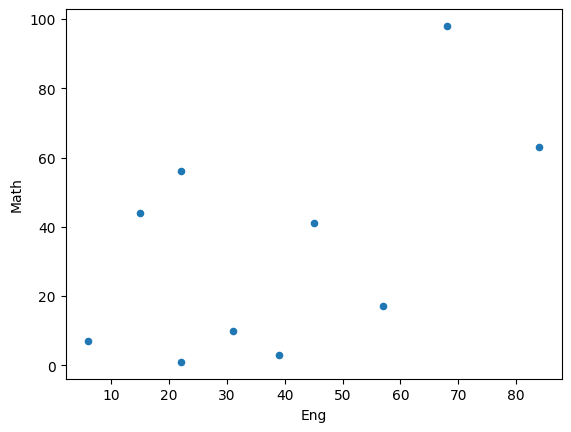

In [60]:
# 散布図

scores_df.plot.scatter(x='Eng', y='Math')

In [61]:
# 共分散行列

np.cov(en_scores, ma_scores, ddof=0)

array([[553.29, 392.7 ],
       [392.7 , 921.4 ]])

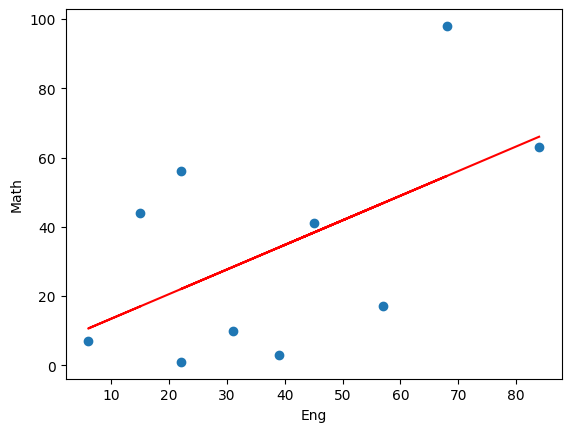

In [62]:
# 回帰直線

import matplotlib.pyplot as plt

poly1 = np.polynomial.polynomial.polyfit(en_scores, ma_scores, deg=1)

plt.xlabel('Eng')
plt.ylabel('Math')
plt.plot(en_scores, np.polynomial.polynomial.polyval(en_scores, poly1), color='red')
plt.scatter(en_scores, ma_scores)

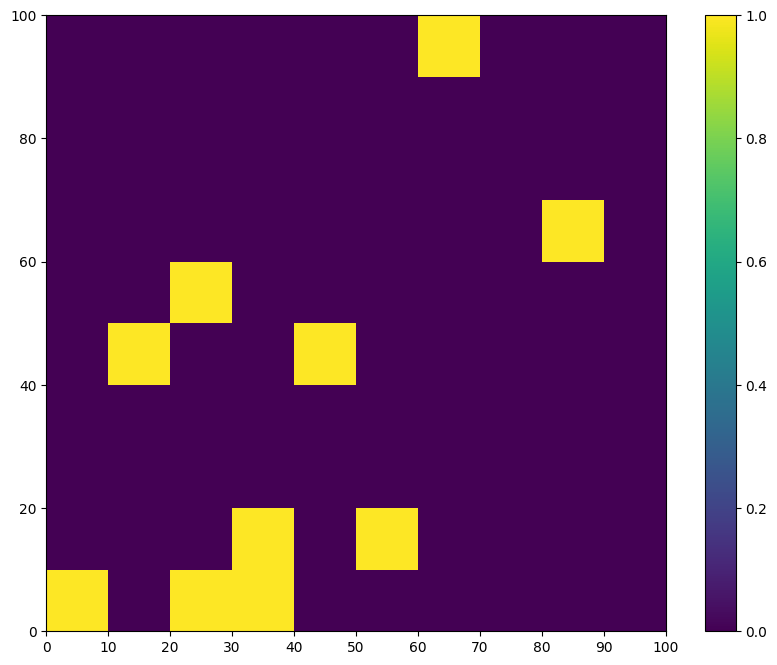

In [63]:
# ヒートマップ

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.hist2d(en_scores, ma_scores, bins=[10,10], range=[(0,100),(0,100)])
ax.set_xticks(c[1])
ax.set_xticks(c[2])
fig.colorbar(c[3], ax=ax)